In [1]:
#트리 모형의 ccp_alpha
#ccp_alpha : 값이 커지면 가지치기하는 노드수가 증가하고, 값이 작하지만 가지치기하는 노드수가 감소한다(가지치기 양을 조절하는 옵션)

In [2]:
import pandas as pd

df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
train_cols = df.columns[:-1]
X = df[train_cols]
y = df['target']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
#가지치기 경로 정보
path = clf.cost_complexity_pruning_path(X_train,y_train)
print(path)

{'ccp_alphas': array([0.        , 0.00120908, 0.00129395, 0.00171604, 0.00240385,
       0.00243056, 0.00249787, 0.00342069, 0.00347222, 0.00416667,
       0.00446429, 0.0046658 , 0.0047619 , 0.00493421, 0.00500801,
       0.00521949, 0.00552839, 0.00554753, 0.00612265, 0.00649872,
       0.00651042, 0.00671263, 0.00678733, 0.00699388, 0.00705882,
       0.008125  , 0.00814294, 0.00902711, 0.00946071, 0.00964286,
       0.01097538, 0.01359506, 0.02139196, 0.0245841 , 0.03258794,
       0.04448901, 0.12995116]), 'impurities': array([0.        , 0.00241815, 0.00500605, 0.01015417, 0.01255801,
       0.01498857, 0.01998432, 0.02682569, 0.03029791, 0.03446458,
       0.03892886, 0.05292626, 0.05768816, 0.06262238, 0.06763039,
       0.07806936, 0.08359775, 0.08914528, 0.09526793, 0.10176664,
       0.10827706, 0.13512758, 0.14191491, 0.14890879, 0.15596761,
       0.17221761, 0.18036056, 0.18938767, 0.19884839, 0.20849124,
       0.21946662, 0.24665674, 0.26804871, 0.2926328 , 0.32522074,


In [6]:
ccp_alphas , impurities = path.ccp_alphas, path.impurities

print(ccp_alphas) #값이 크면 제거된 노드수가 증가(가지치기 양을 조정하는 옵션)
print(impurities) #노드의 불순도

[0.         0.00120908 0.00129395 0.00171604 0.00240385 0.00243056
 0.00249787 0.00342069 0.00347222 0.00416667 0.00446429 0.0046658
 0.0047619  0.00493421 0.00500801 0.00521949 0.00552839 0.00554753
 0.00612265 0.00649872 0.00651042 0.00671263 0.00678733 0.00699388
 0.00705882 0.008125   0.00814294 0.00902711 0.00946071 0.00964286
 0.01097538 0.01359506 0.02139196 0.0245841  0.03258794 0.04448901
 0.12995116]
[0.         0.00241815 0.00500605 0.01015417 0.01255801 0.01498857
 0.01998432 0.02682569 0.03029791 0.03446458 0.03892886 0.05292626
 0.05768816 0.06262238 0.06763039 0.07806936 0.08359775 0.08914528
 0.09526793 0.10176664 0.10827706 0.13512758 0.14191491 0.14890879
 0.15596761 0.17221761 0.18036056 0.18938767 0.19884839 0.20849124
 0.21946662 0.24665674 0.26804871 0.2926328  0.32522074 0.36970975
 0.49966092]


Text(0, 0.5, 'impurities')

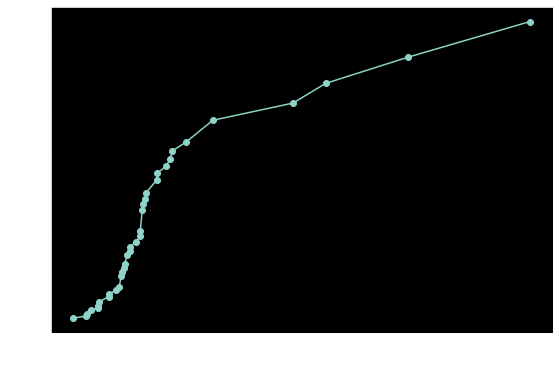

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(ccp_alphas[:-1],impurities[:-1],marker='o')
plt.xlabel('ccp_alphas')
plt.ylabel('impurities')

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

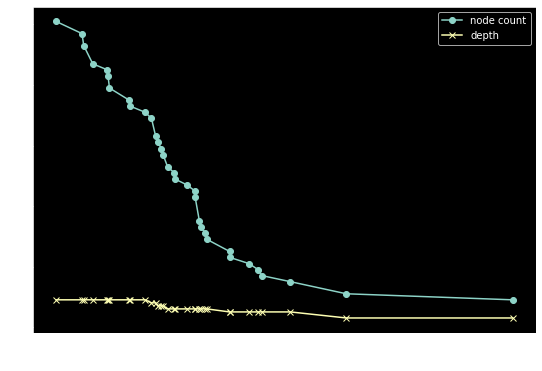

In [16]:
#마지막 값은 전체 트리를 가지치기하여 하나의 노드로 트리를 남기는 알파값이므로 제외하고 출력
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(9,6))
plt.plot(ccp_alphas, node_counts, marker = 'o', label='node count')
plt.plot(ccp_alphas, depth, marker='x', label='depth')
plt.xlabel('alpha')
plt.legend()
#alpha가 증가하면 노드 갯수가 감소한다.(가지치기를 많이 하는 옵션)

최고 정확도: 0.9883268482490273
최적의 alpha: 0.0


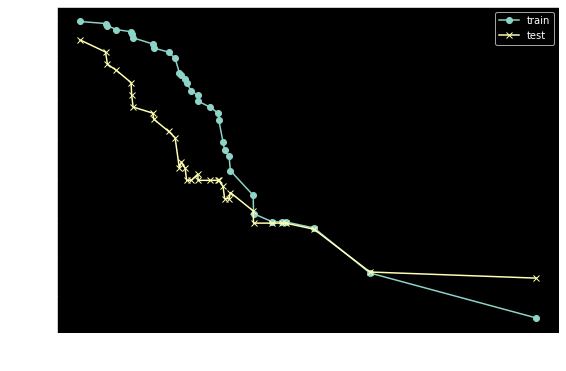

In [17]:
import numpy as np

train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

m = max(test_scores)
i = np.argmax(test_scores)
print('최고 정확도:', m)
print('최적의 alpha:',ccp_alphas[i])

plt.figure(figsize=(9,6))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas, train_scores, marker='o',label='train')
plt.plot(ccp_alphas, test_scores, marker='x', label='test')
plt.legend()

#ccp_alpha가 0이면 과적합 문제 발생
#알파가 증가하면 가지치기가 진행되어 일반적인 트리가 됨